# Case Study - Wine Quality Prediction

# Context
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are 
much more normal wines than excellent or poor ones).

# Problem Statement:
    
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the 
wine-quality dataset from the UC Irvine Machine Learning Repository.
The wine dataset is a classic and very easy multi-class classification dataset.

## Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

## Missing Attribute Values: None

### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

# Import all necessary modules and load the data

In [1]:
!pip install plotly

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [3]:
# Reading zip file of Red wine
wine = pd.read_csv("C:/Users/anushka singh/3D Objects/MachineLearning/red-wine-quality-cortez-et-al-2009.zip")

In [4]:
# take a look at dataset
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [5]:
# information of a dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* Except Quality variable of wine dataset, all other variables are of float datatype & quality variable is our dependent variable of categorical type. 

In [6]:
# Size of dataset
wine.shape                   

(1599, 12)

* In this wine dataset, 12 feature variable's & 1599 observation's are present.   

In [7]:
# let's checkout the classes present in the categorical variable
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
fig = px.bar(wine,x = 'quality', color_discrete_sequence = ['purple'], title='Different type of wine quality')
fig.show()

### Highly Imbalanced dataset
* Here, we have 6 different classes in "quality variable".
* In which, datapoints are collectively more in 5th & 6th class in-comparison to other's.

In [9]:
# Checking Null Values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* No Null Values present in the wine dataset.

### > Correlation between all the feature variable's showing through a matplotlib

In [10]:
sns.set(style="white")
d = pd.DataFrame(data=wine ,columns=['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'])

In [11]:
d

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

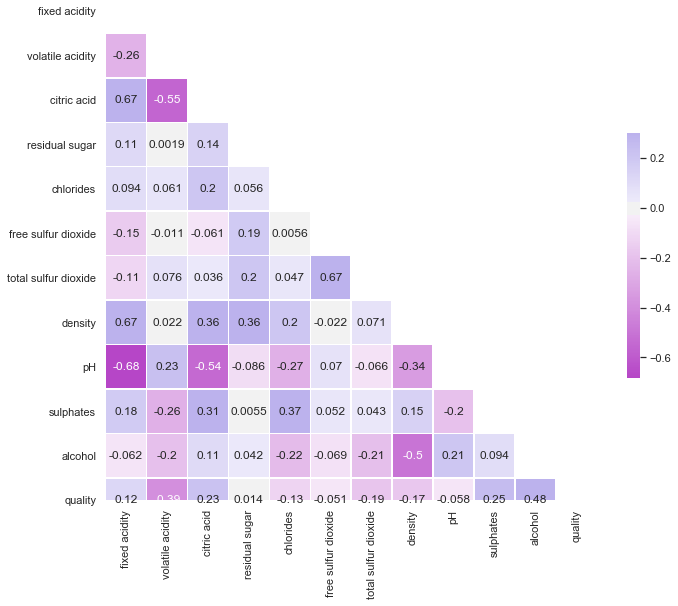

In [12]:
# Computing correlation matrix
corr = d.corr()

# Generating an upper triangle
triangle = np.triu(np.ones_like(corr, dtype=bool))     #np.triu() used for making half triangle

# Matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generating a custom colormap
cmap = sns.diverging_palette(300,270, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=triangle, cmap=cmap, vmax=.3,center=0, linewidths=.5,cbar_kws={"shrink":.5} , annot=True)

* Highly positive correlation between quality & alcohol.
* Citric acid & Density both are highly positive correlated to fixed acidity.
* Citric acid is highly negative correlated to volatile acidity.
* pH is highly negative correlated to fixed acidity.

In [13]:
# Descriptive Statistics
(wine.describe().transpose())

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

## Univariate and Bivariate Analysis

In [14]:
# Using Replace command
wine.quality = wine.quality.replace(4,5)
wine.quality = wine.quality.replace(8,6)
wine.quality = wine.quality.replace(3,7)

In [15]:
fig = px.pie(wine, names = 'quality', title='Distribution of Wine Quality' , color_discrete_sequence=['purple'])
fig.show()

* 5th quality is much more famous red wine then 6th & 7th quality.
* 7th quality having less contribution to the data, so we mixed it into 6th quality
* Let's see the graph.

In [16]:
wine.quality = wine.quality.replace(7,6)
wine.quality.value_counts(normalize=True)

6    0.540963
5    0.459037
Name: quality, dtype: float64

In [17]:
fig = px.pie(wine, names = 'quality', title='Distribution of Wine Quality', color_discrete_sequence = ['purple'] )
fig.show()

### Now, we have two qualities of wine, let's check how quality related to other factors

In [18]:
df = wine
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [19]:
df = df.drop('quality', axis =1)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

## Relationship between dependent & all independent variable's using Boxplot.

In [20]:
fig = px.box(wine, x='quality', y = 'alcohol', title='Relation between quality & alcohol ')
fig.show()

fig = px.box(wine, x='quality', y = 'sulphates', title='Relation between quality & sulphates ')
fig.show()

fig = px.box(wine, x='quality', y = 'pH', title='Relation between quality & pH ')
fig.show()

fig = px.box(wine, x='quality', y = 'density', title='Relation between quality & density ')
fig.show()

fig = px.box(wine, x='quality', y = 'total sulfur dioxide', title='Relation between quality & total sulfur dioxide ')
fig.show()

fig = px.box(wine, x='quality', y = 'free sulfur dioxide', title='Relation between quality & free sulfur dioxide ')
fig.show()

fig = px.box(wine, x='quality', y = 'chlorides', title='Relation between quality & chlorides ')
fig.show()

fig = px.box(wine, x='quality', y = 'residual sugar', title='Relation between quality & residual sugar ')
fig.show()

fig = px.box(wine, x='quality', y = 'citric acid', title='Relation between quality & citric acid ')
fig.show()

fig = px.box(wine, x='quality', y = 'volatile acidity', title='Relation between quality & volatile acidity') 
fig.show()

fig = px.box(wine, x='quality', y = 'fixed acidity', title='Relation between quality & fixed acidity ')
fig.show()

In [21]:
# Plotting scatterplot between two numerical feature variable

fig = px.scatter(wine,x="fixed acidity", y="alcohol",  color="quality", title = 'Presence of Alcohol in Wine Quality with Fixed Acidity')
fig.show()

fig = px.scatter(wine,y="sulphates", x="alcohol",  color="quality", title = 'Presence of Alcohol in Wine Quality with Sulphates')
fig.show()

fig = px.scatter(wine,y="pH", x="alcohol",  color="quality", title = 'Presence of Alcohol in Wine Quality with pH')
fig.show()



### Less number of sulphate % present to preserve the Red wine. 

* Between 10 -12 % of alcohol rate, the acidity is fixed between 6-10 g/dm^3 which evaporate slowly.

* Some of the red wines are very acidic in nature in the 5th, 6th quality.

## Splitting dataset into train & test (70:30 ratio) on the basis of Independent & dependent variables.

* Using Scikit learn library for splitting the dataset

In [22]:
wine.quality = wine.quality.astype("category")

In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null category
dtypes: category(1), float64(11)
memory usage: 139.2 KB


In [24]:
#import sklearn library
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
#define dependent variable & independent variable
X = wine.drop('quality', axis=1)
Y = wine['quality']

In [25]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 19, test_size=0.30)

In [26]:
# Let's see the X & Y variable value's
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [27]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: category
Categories (2, int64): [5, 6]

In [28]:
# Let's check the size of Train Test data
X_train.shape,X_test.shape

((1119, 11), (480, 11))

# ------------------------------------- Decision Tree----------------------------------------------

### Creating a Decision Tree using Entropy Method

In [29]:
# importing decisionTreeClassifier package
from sklearn.tree import DecisionTreeClassifier

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [30]:
#fitting X & Y into model_entropy
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

* Let's check the accuracy & confusion matrix

In [31]:
# Accuracy of Train dataset
model_entropy.score(X_train, y_train)

1.0

In [32]:
# Accuracy of Test dataset
model_entropy.score(X_test,y_test)

0.78125

In [33]:
predictions = model_entropy.predict(X_test)
c=classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           5       0.76      0.74      0.75       212
           6       0.80      0.82      0.81       268

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



In [ ]:
show_tree(model_entropy,X,'dec_gini.png')

### This is a highly overfitted model. We can improve our model accuracy by tunning the parameter's control.

In [69]:
clf = DecisionTreeClassifier(ccp_alpha = 0, criterion = "entropy", max_depth = 5,
                             random_state =100, min_samples_leaf = 3, max_features = "sqrt",)

In [70]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [71]:
# Accuracy of Train dataset
clf.score(X_train, y_train)

0.7613941018766756

In [72]:
# Accuracy of Test dataset
clf.score(X_test,y_test)

0.7083333333333334

In [73]:
predictions = clf.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
c=classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           5       0.66      0.75      0.71       223
           6       0.76      0.67      0.71       257

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480



# ---------------------------------Visualizing the Decission Tree----------------------------------

In [75]:
import sys
!{sys.executable} -m pip install graphviz==0.9

In [76]:
from sklearn.tree import export_graphviz
from scipy import misc
import io
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz
import os     
import sklearn
os.environ["PATH"] += os.pathsep + 'C:/Users/anushka singh/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/graphviz'


xvar = wine.drop('quality', axis=1)
feature_cols = xvar.columns

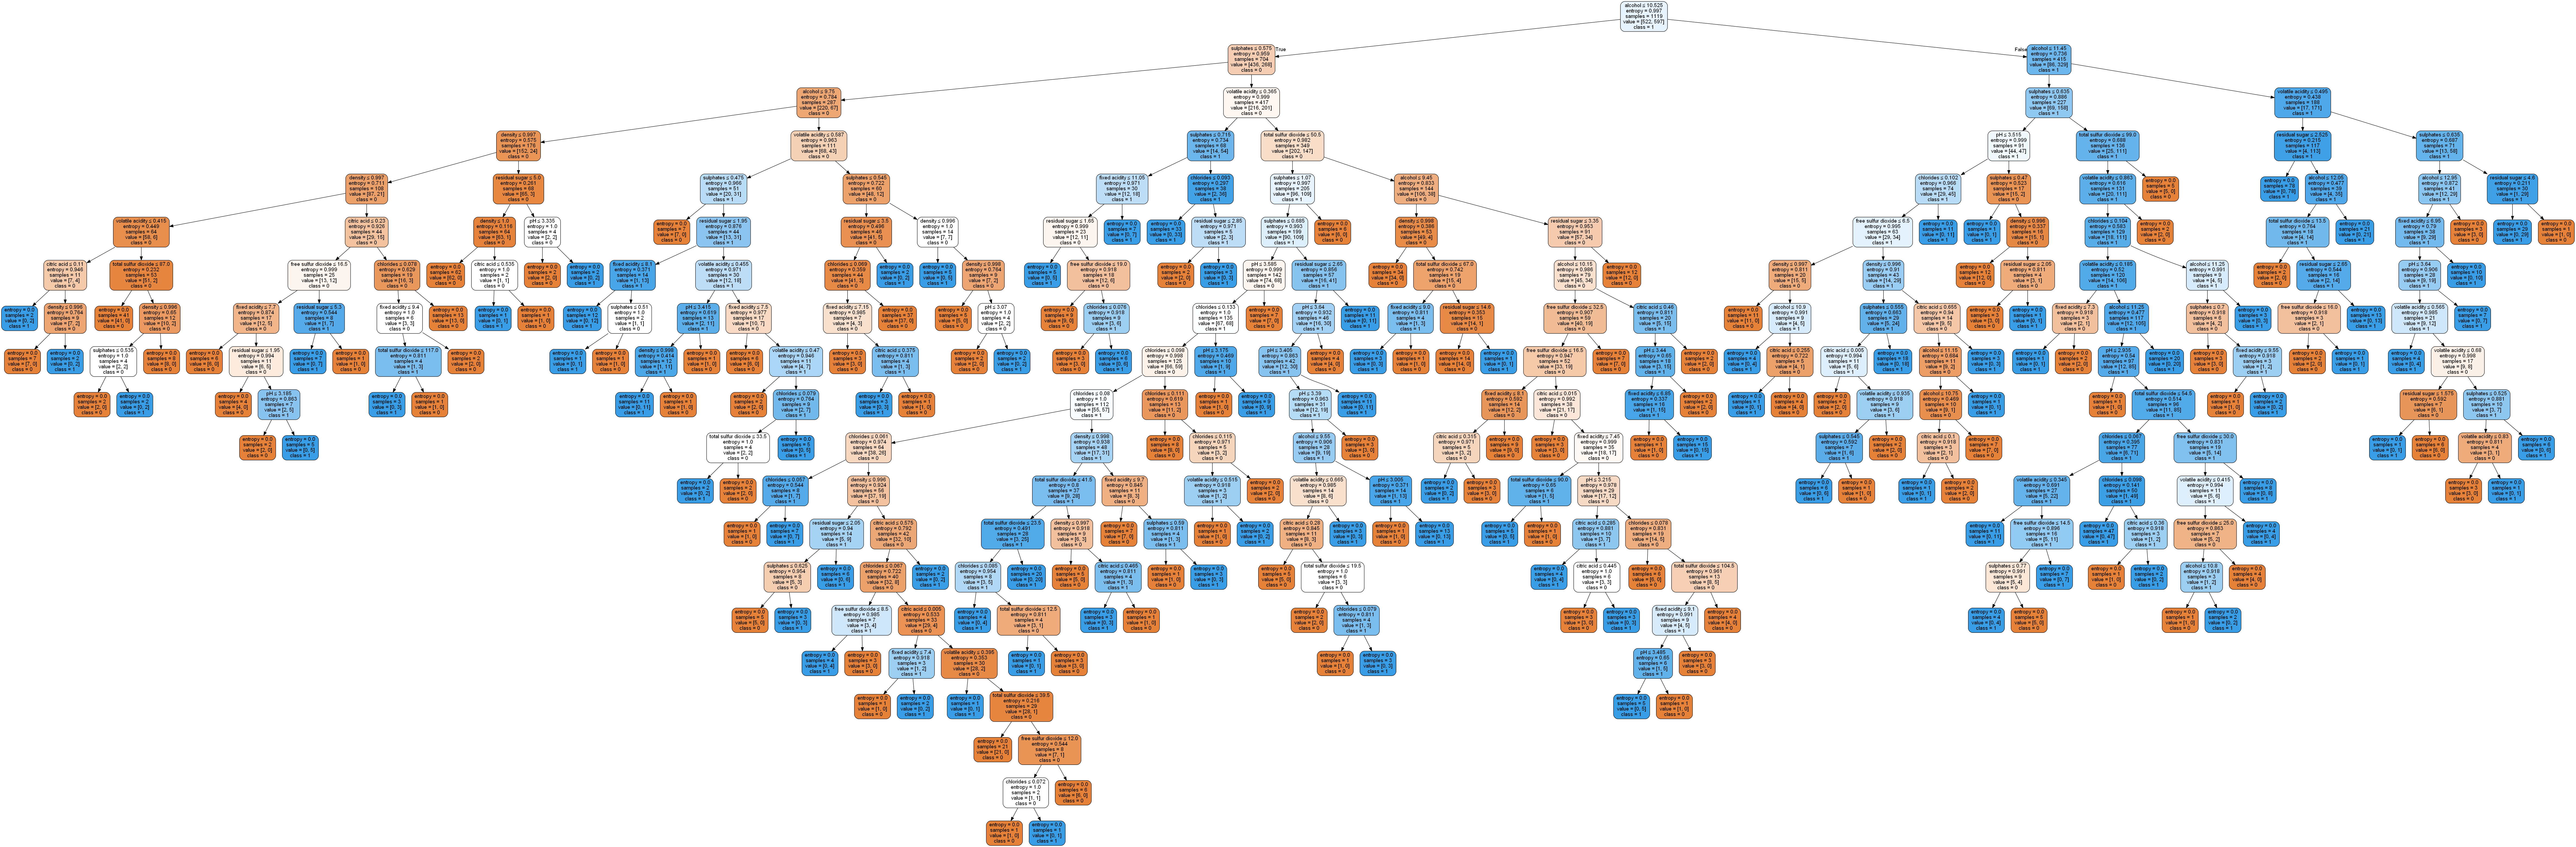

In [77]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('model_entropy.png')
Image(graph.create_png())

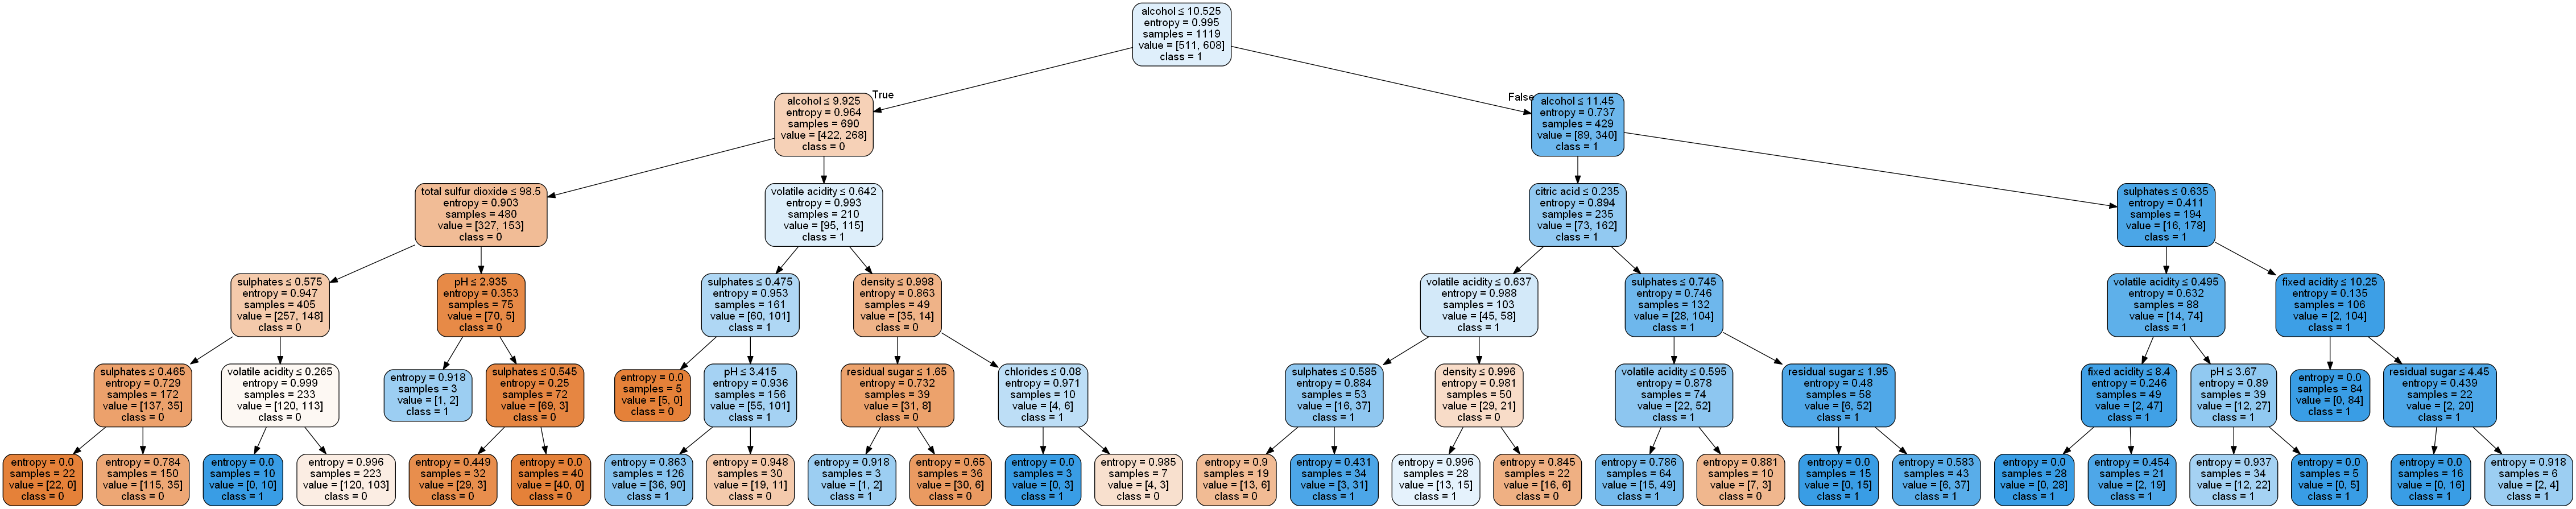

In [78]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('clf.png')
Image(graph.create_png())

In [43]:
preds_pruned = model_entropy.predict(X_test)
preds_pruned_train = model_entropy.predict(X_train)

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.78125
1.0


In [46]:
acc_DT = accuracy_score(y_test, preds_pruned)
acc_DT

0.78125

In [249]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [250]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# --------------------------------------RandomForest Classifier-------------------------------------

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### Model 1

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 19, test_size=0.30)

In [86]:
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[167  45]
 [ 50 218]]
Classification Report:
              precision    recall  f1-score   support

           5       0.77      0.79      0.78       212
           6       0.83      0.81      0.82       268

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

Accuracy: 0.8020833333333334


### RandomForest Model-1 has accuracy of 82%.

### Model 2

In [54]:
classifier_2 = RandomForestClassifier(n_estimators = 50, criterion = "entropy", random_state=42)
classifier_2.fit(X_train, y_train)
y_pred = classifier_2.predict(X_test)

In [55]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[169  43]
 [ 37 231]]
Classification Report:
              precision    recall  f1-score   support

           5       0.82      0.80      0.81       212
           6       0.84      0.86      0.85       268

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480

Accuracy: 0.8333333333333334


### RandomForest Model-2 has accuracy of 83%.

### Model 3

In [56]:
classifier_3 = RandomForestClassifier(n_estimators = 50, criterion = "entropy", random_state=19999,
                                      max_depth=3,max_leaf_nodes=2 , class_weight = 'balanced',
                                     max_features='log2')
classifier_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features='log2',
                       max_leaf_nodes=2, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=19999,
                       verbose=0, warm_start=False)

In [57]:
y_pred = classifier_3.predict(X_test)

In [58]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[156  56]
 [ 68 200]]
Classification Report:
              precision    recall  f1-score   support

           5       0.70      0.74      0.72       212
           6       0.78      0.75      0.76       268

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480

Accuracy: 0.7416666666666667


### RandomForest Model-3 has accuracy of 74% which is lesser than above models.

# -------------------------------Bagging Classifier------------------------------------------------

### Bagging (Bootstrap Aggregating) is a widely used an ensemble learning algorithm in machine learning. The algorithm builds multiple models from randomly taken subsets of train dataset and aggregates learners to build overall stronger learner.

In [59]:
from sklearn.ensemble import BaggingClassifier

In [60]:
X = wine.drop('quality', axis=1)
Y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size=0.30)

# Model-1

In [61]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)

In [62]:
ytest_pred=bag_model.predict(X_test)
acc=bag_model.score(X_test, y_test)
print("Accuracy is : ", acc*100)

Accuracy is :  77.08333333333334


In [63]:
print(confusion_matrix(y_test, ytest_pred)) 

[[165  58]
 [ 52 205]]


#### >>> Model-1 is 78% accurate.

# Model-2

In [64]:
# Changing some hyperparameter
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model = BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True, random_state=9009)
bag_model = bag_model.fit(X_train,y_train)

In [65]:
ytest_pred=bag_model.predict(X_test)
acc=bag_model.score(X_test, y_test)
print("Accuracy is : ", acc*100)

Accuracy is :  80.0


In [66]:
print(confusion_matrix(y_test, ytest_pred)) 

[[173  50]
 [ 46 211]]


#### >>> Model-2 is 2% better than Model-1 i.e, Model-2 is 80% accurate.

# Model-3

In [67]:
# Changing some hyperparameter
dtc = DecisionTreeClassifier(criterion="gini")
bag_model = BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True, random_state=9009)
bag_model = bag_model.fit(X_train,y_train)

In [68]:
ytest_pred=bag_model.predict(X_test)
acc=bag_model.score(X_test, y_test)
print("Accuracy is : ", acc*100)

Accuracy is :  78.33333333333333


### The result is same as above in Model-1 when we are taking criterion = "gini".